In [1]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
array-record                 0.4.1
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.2
certifi                      2023.7.22
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.0
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
dm-tree                      0.1.8
etils                        1.5.2
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.44.0
fsspec                       2023.10.0
gast                         0.5.4
google-auth                  2.23.4
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
googleapis-common-protos     1.61.0
grpcio                       1.59.2


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [6]:
from matplotlib import pyplot as plt

In [2]:
!pip install tensorflow_datasets
!pip install tfds-nightly


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install -q tfds-nightly tensorflow matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow_datasets as tfds

In [7]:
ds = tfds.load('fashion_mnist', split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\HP\tensorflow_datasets\fashion_mnist\3.0.1.incompleteZ80RI2\fashion_mnist-train.tfrecord*..…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\HP\tensorflow_datasets\fashion_mnist\3.0.1.incompleteZ80RI2\fashion_mnist-test.tfrecord*...…

Dataset fashion_mnist downloaded and prepared to C:\Users\HP\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [10]:
ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

# Visualization and Built Data

In [11]:
import numpy as np

In [12]:
# Setup connection AKA iterator
dataiterator = ds.as_numpy_iterator()

In [16]:
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  2],
         [127],
         [106],
         [136],
         [102],
         [147],
         [136],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 64],
         [254],
         [255],
         [254],
         [255],
         [255],
         [255],
         [247],
         [161],
         [122],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

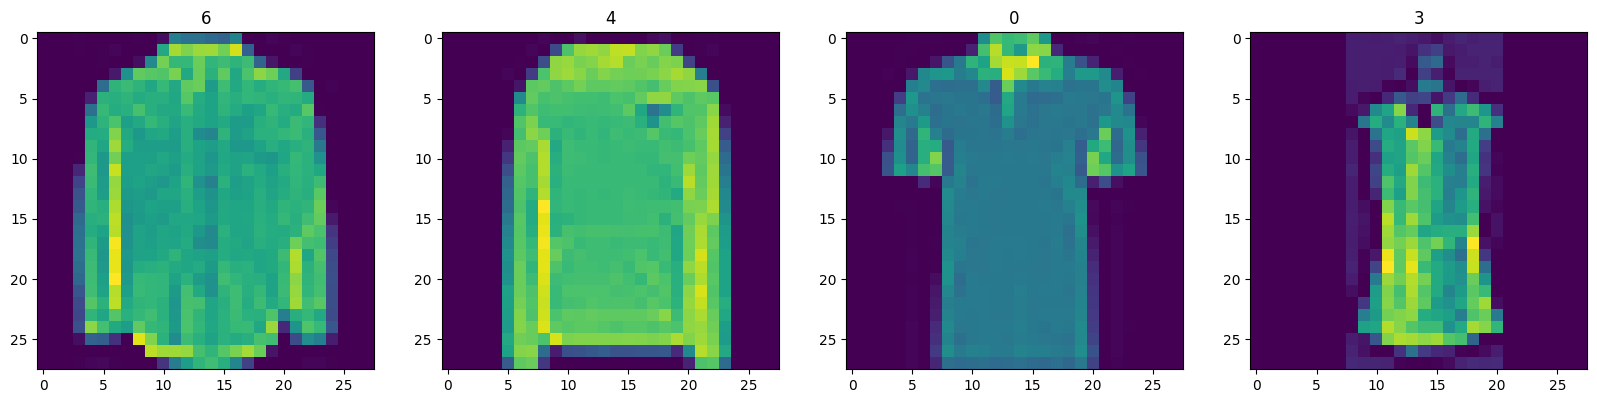

In [22]:
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx in range(4): 
    # Grab an image and label
    sample = dataiterator.next()
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(sample['image']))
    # Appending the image label as the plot title 
    ax[idx].title.set_text(sample['label'])

# Data Preprocessing and Scaling

In [23]:
# Scale and return images only 
def scale_images(data): 
    image = data['image']
    return image / 255

In [25]:
# Reload the dataset 
ds = tfds.load('fashion_mnist', split='train')
#Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images) 
# Cache the dataset for that batch 
ds = ds.cache()
# Shuffle it up 
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(128)
# Reduces the likelihood of bottlenecking 
ds = ds.prefetch(64)

In [26]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# 3. Built Neural Network

#### 3.1 Import Modelling Components

In [27]:
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

#### 3.2 Built Generator

In [41]:
def build_generator(): 
    model = Sequential()
    
    # Takes in random values and reshapes it to 7x7x128
    # Beginnings of a generated image
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    # Upsampling block 1 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Upsampling block 2 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Conv layer to get to one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))
    
    return model

In [48]:
generator = build_generator()

In [49]:
generator.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_5 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_7 (UpSamplin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

In [50]:
img = generator.predict(np.random.randn(4, 128, 1))
img

1/1 [==============================] - 0s 135ms/step


array([[[[0.50303763],
         [0.49955803],
         [0.49711692],
         ...,
         [0.50522256],
         [0.5003332 ],
         [0.5058807 ]],

        [[0.50868106],
         [0.5019161 ],
         [0.49818492],
         ...,
         [0.5003694 ],
         [0.50576264],
         [0.51126164]],

        [[0.5036902 ],
         [0.4920827 ],
         [0.4925943 ],
         ...,
         [0.5042013 ],
         [0.50709385],
         [0.5093026 ]],

        ...,

        [[0.499878  ],
         [0.5098902 ],
         [0.5108516 ],
         ...,
         [0.49680153],
         [0.5010858 ],
         [0.5032447 ]],

        [[0.5031845 ],
         [0.5092464 ],
         [0.5138522 ],
         ...,
         [0.5016878 ],
         [0.5031931 ],
         [0.50264883]],

        [[0.49854034],
         [0.5025959 ],
         [0.50443536],
         ...,
         [0.5013213 ],
         [0.50384545],
         [0.50079435]]],


       [[[0.5011396 ],
         [0.49828798],
         [0.50

# Generate new fashion

In [71]:
img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 50ms/step


In [72]:
img.shape

(4, 28, 28, 1)

1/1 [==============================] - 0s 48ms/step


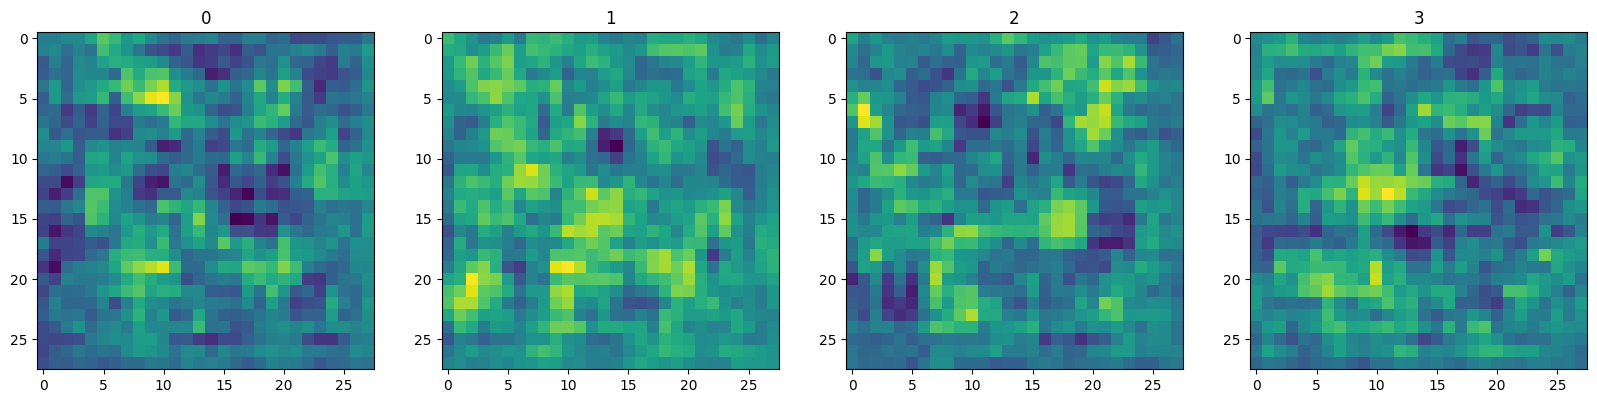

In [55]:
img = generator.predict(np.random.randn(4,128,1))
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx, img in enumerate(img): 
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(img))
    # Appending the image label as the plot title 
    ax[idx].title.set_text(idx)

### 3.3 Build Discriminator

In [62]:
def build_discriminator(): 
    model = Sequential()
    
    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model 

In [63]:
discriminator = build_discriminator()

In [64]:
discriminator.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_5 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 128)      

In [73]:
img.shape

(4, 28, 28, 1)

In [74]:
discriminator.predict(img)

1/1 [==============================] - 0s 103ms/step


array([[0.49877357],
       [0.49853837],
       [0.49851644],
       [0.49868232]], dtype=float32)

# Construct Training Loop

### 4.1 Setup Losses and Optimizers

In [75]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to be the loss for both 
from tensorflow.keras.losses import BinaryCrossentropy

In [76]:
g_opt = Adam(learning_rate=0.0001) 
d_opt = Adam(learning_rate=0.00001) 
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

### 4.2 Build Subclassed Model

In [77]:
# Importing the base model class to subclass our training step 
from tensorflow.keras.models import Model

In [78]:
class FashionGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 
    
    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
             # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [79]:
# Create instance of subclassed model
fashgan = FashionGAN(generator, discriminator)

In [80]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

### 4.3 Build Callback

In [81]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [ ]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))